In [1]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("GraphRecipes")
Pkg.add("Plots")

using GraphRecipes, Plots, Graphs
using JuMP, GLPK, Random, Test, LinearAlgebra


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
kmax = [0 5 3 0;
        0 0 5 4;
        0 0 0 5;
        0 0 0 0]
s = 1
t = 4
N=4
model = Model(GLPK.Optimizer)
set_silent(model)
@variable(model, x[1:N,1:N] >= 0, Int)
@variable(model, Z >= 0, Int)
@objective(model, Max, Z)
# Añadir restricciones para que los elementos de x correspondan con kmax
for i in 1:N
        for j in 1:N
                if kmax[i, j] > 0
                        @constraint(model, x[i, j] <= kmax[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end
@constraint(model, g,  sum(x[s,:]) == Z)
@constraint(model, h,  sum(x[:,t]) == Z)

indices_a_omitir = [t, s]


c2 = Vector{Int}()  # V\{s,t}
for i in 1:N 
        if i ∉ indices_a_omitir 
                 push!(c2, i)
        end
end

for i in c2
        @constraint(model, sum(x[i, :]) == sum(x[:, i]))
end

print(model)

# Call optimize! before retrieving the solution
optimize!(model)


@show objective_value(model)@show value.(Z)

Max Z
Subject to
 

x[1,1] = 0
 x[1,4] = 0
 x[2,1] = 0
 x[2,2] = 0
 x[3,1] = 0
 x[3,2] = 0
 x[3,3] = 0
 x[4,1] = 0
 x[4,2] = 0
 x[4,3] = 0
 x[4,4] = 0
 g : x[1,1] + x[1,2] + x[1,3] + x[1,4] - Z = 0
 h : x[1,4] + x[2,4] + x[3,4] + x[4,4] - Z = 0
 x[2,1] - x[1,2] - x[3,2] - x[4,2] + x[2,3] + x[2,4] = 0
 x[3,1] + x[3,2] - x[1,3] - x[2,3] - x[4,3] + x[3,4] = 0
 x[1,2] ≤ 5
 x[1,3] ≤ 3
 x[2,3] ≤ 5
 x[2,4] ≤ 4
 x[3,4] ≤ 5
 x[1,1] ≥ 0
 x[2,1] ≥ 0
 x[3,1] ≥ 0
 x[4,1] ≥ 0
 x[1,2] ≥ 0
 x[2,2] ≥ 0
 x[3,2] ≥ 0
 x[4,2] ≥ 0
 x[1,3] ≥ 0
 x[2,3] ≥ 0
 x[3,3] ≥ 0
 x[4,3] ≥ 0
 x[1,4] ≥ 0
 x[2,4] ≥ 0
 x[3,4] ≥ 0
 x[4,4] ≥ 0
 Z ≥ 0
 x[1,1] integer
 x[2,1] integer
 x[3,1] integer
 x[4,1] integer
 x[1,2] integer
 x[2,2] integer
 x[3,2] integer
 x[4,2] integer
 x[1,3] integer
 x[2,3] integer
 x[3,3] integer
 x[4,3] integer
 x[1,4] integer
 x[2,4] integer
 x[3,4] integer
 x[4,4] integer
 Z integer
objective_value(model) = 

8.0


value.(Z) = 8.0
#= /home/saul/Desktop/University/Ingenieria logistica/entregas/flujo_maximo.ipynb:46 =# @show(value.(Z)) = 8.0


8.0

Generando datos aleatorios

In [3]:

n=5 # número de nodos
Random.seed!(777)   

kmax = zeros(n, n) # Matriz de capacidades de los arcos
for i in 1:n
    for j in i:n
        if i != j
            kmax[i, j] = rand(0:10)
        end
    end
end

s = 1 # Nodo fuente
t = n


println("s = ", s)
println("t = ", t)
println("kmax = ")
kmax




s = 1
t = 5
kmax = 


5×5 Matrix{Float64}:
 0.0  9.0  4.0   0.0  7.0
 0.0  0.0  2.0   1.0  7.0
 0.0  0.0  0.0  10.0  0.0
 0.0  0.0  0.0   0.0  5.0
 0.0  0.0  0.0   0.0  0.0

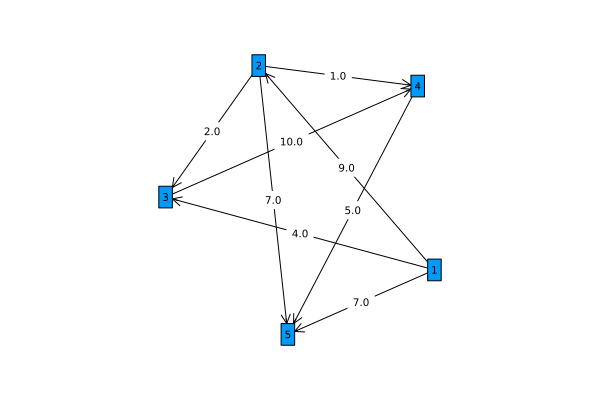

In [4]:
edgelabel_dict = Dict()
edgelabel_mat = Array{String}(undef, n, n)
for i in 1:n
    for j in 1:n
        edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string(kmax[i, j])
    end
end
edgelabel_vec = edgelabel_mat[:]
graphplot(kmax, names=1:n, edgelabel=edgelabel_dict, curvature_scalar=0, nodeshape=:rect)

In [5]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Define N before using it
N = size(kmax, 1)

@variable(model, x[1:N,1:N] >= 0, Int)
@variable(model, Z >= 0, Int)
@objective(model, Max, Z)

# Añadir restricciones para que los elementos de x correspondan con kmax
for i in 1:N
    for j in 1:N
        if kmax[i, j] > 0
            @constraint(model, x[i, j] <= kmax[i, j])
        else
            @constraint(model, x[i, j] == 0)
        end
    end
end

@constraint(model, g,  sum(x[s,:]) == Z)
@constraint(model, h,  sum(x[:,t]) == Z)

indices_a_omitir = [t, s]
c2 = Vector{Int}()  # V\{s,t}
for i in 1:N 
        if i ∉ indices_a_omitir 
                 push!(c2, i)
        end
end

for i in c2
        @constraint(model, sum(x[i, :]) == sum(x[:, i]))
end



In [6]:
# Call optimize! before retrieving the solution
optimize!(model)


println("Flujo maximo:", value(Z))

println("Flujos en los arcos:")

for i in 1:N
    println("  Nodo $i")
    for j in 1:N
        if value(x[i, j]) > 0
            println("    Flujo de $i->$j: ", value(x[i, j]))
        end
    end
end

Flujo maximo:19.0


Flujos en los arcos:
  Nodo 1
    Flujo de 1->2: 8.0
    Flujo de 1->3: 4.0
    Flujo de 1->5: 7.0
  Nodo 2
    Flujo de 2->4: 1.0
    Flujo de 2->5: 7.0
  Nodo 3
    Flujo de 3->4: 4.0
  Nodo 4
    Flujo de 4->5: 5.0
  Nodo 5
